# Mouvement brownien

Dans ce notebook, nous allons utiliser les nombres aléatoires avec lesquels nous avons joué dans le notebook précédent. 

L'équation qu'on a introduite pour l'évolution de la position d'une molécule de teinture est:

$$
dx=x(t+dt)−x(t)=ds
$$

$ds$ est un déplacement résultant de la collision avec les molécules d'eau aux allentour de la molécule de teinture et doit être correctement modélisée. Techniqument parlant, l'équation ci-dessus est appelée *equation stochastique différentielle (ESD) car elle contient une contribution stochastique(ou aléatoire). Il existe beaucoup de phénomènes qui sont modélisée à partir de cette équation comme le mouvement brownien. 

Dans le notebook et pour le mouvement brownien, nous avions $ds$ exprimé selon comme:

$$
ds=\sqrt{2\alpha dt}\cal{N(0,1)}
$$

Ou $\alpha$ est le même coefficient de diffusion qui est utilisé dans l'équation de diffusion. De plus, à chaque itération de temps, $\cal{N(0,1)}$ est un nombre aléatoire qui est généré à partir d'une distribution normal (Gaussienne) $f(n)$, centrée autour de $0$, et avec une variance valant $1$:

$$
f(n)=\frac{1}{\sqrt{2\pi}}e^{-\frac12 n^2}
$$

Ici, on considère, pour simplifier, que le mouvement brownien est un mouvement unidimensionel. Il est facile d'étendre le système en 2D ou 3D en ajoutant une équation identique pour chaque dimensions supplémentaires.

Dans le but d'estimer l'évolution de la teinture, on doit suivre la trajectoire d'un échantillon de molécules. A partir de leurs positions, on a pu prédire leurs densité par l'expression:

$$
\rho(x,t) dx=n(x,t)/N
$$

où $n(x,t)$ représente, à un temps donné, le nombre de molécules de teinture contenu dans un intervalla $dx$ centré autour de $x$ et $N$ est le nombre total de molécules dans l'échantillon.

Pour tester le modèle stochastique et faire une comparaison avec l'équation de diffusion, on a initilaisé la position de notre échantillon avec une distribution Gaussienne:

$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$ 

avec $\sigma^2$ la variance de la position et $\mu$ est la moyenne. Comme $n(x,0)=NP(x)dx$, on avait $\rho(x,0)=P(x)$. Dans ce cas là, la solution de l'équation de diffusion, 

$$
\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}
$$

peut être trouvée de manière exacte et est donnéé par:

$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu)^2}{2\sigma_t^2}}
$$

avec $\sigma^2_t = 2\alpha t + \sigma^2$. 

Dans le notebook, on a retrouvé cette solution en utilisant la technique "random walk". 

## Challenge n°1

- Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

Ici, nous ajoutons une contribution au déplacement $dx +c dt$ et on veut trouver l'équation de diffusion à partir de ce nouveau déplacement. Comme nous avons déjà résolu le problème pour 

$$
dx=\sqrt{2\alpha dt}\cal{N(0,1)}
$$
, alors, on pose 

$$ dy = dx -cdt = \sqrt{2\alpha dt}\cal{N(0,1)}$$

On peut à présent dire que le déplacement $dy$ suit les mêmes lois que le déplacement $ds$ du notebook. On peut alors écrire 

$$
\frac{\partial \rho(y,t)}{\partial t}=\alpha \frac{\partial^2 \rho(y,t)}{\partial x^2}
$$

Ce que nous voulons, c'est réécrire cette équation de diffusion en termes de $\rho (x,t)$. On va donc faire le changement de variable:

$$  y \rightarrow x-ct$$
$$ t \rightarrow t$$

et réécrire l'équation de diffusion.

$$\frac{\partial}{\partial y}\left(\frac{\partial \rho (y,t)}{\partial y}\right)= \frac{\partial^2 \rho (x,t)}{\partial x^2}-\frac{2}{c}\frac{\partial^2 \rho (x,t)}{\partial t \partial x} +\frac{1}{c^2}\frac{\partial^2 \rho (x,t)}{\partial t^2}$$

Et comme il n'y a pas de changement de variable selon le temps, 

$$\frac{\partial \rho (y,t)}{\partial t}=\frac{\partial \rho (x,t)}{\partial t}$$

L'équation de diffusion pour le déplacement $dx$ est donc:

$$\frac{\partial \rho (x,t)}{\partial t}= \alpha\left(\frac{\partial^2 \rho (x,t)}{\partial x^2}-\frac{2}{c} \frac{\partial^2 \rho (x,t)}{\partial x \partial t} +\frac{1}{c^2} \frac{\partial^2 \rho (x,t)}{\partial t^2}\right)$$

et a pour solution:

$$\rho (x,t)= \frac{1}{\sqrt{2\pi \sigma^2_t}}e^{-\frac{(x-ct-\mu)^2}{2\sigma_t^2}}$$

A présent, on peut représenter la trajectoire pour une molécule au repos en x=0 initialement avec un déplacement $dx$. On commence par importer la bibliothèque numpy et toutes les autres fonctions utiles.

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Pour un peu voir ce qu'il se passe, nous allons étudier ce phénomène avec deux valeurs de c différentes, une garnde et une plus petite.

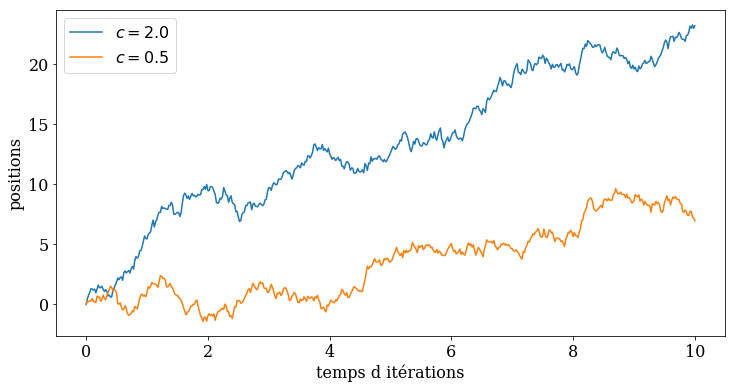

In [2]:
# Nombre total de simulations
T=10.0

# Nombre d'itérations dans le temps et intervalle de temps dt
nt=500
dt=T/nt

# coefficient de diffusion
alpha=2.0

# positions de la particule et condition initial
t = numpy.arange(0,T+dt,dt)
x1 = numpy.empty(nt+1)
x2 = numpy.empty(nt+1)
x1[0]=0
x2[0]=0

#constante c
c1=2.0
c2=0.5

# Intégration sur le temps 
for i in range(nt):
    
    x1[i+1]=x1[i]+c1*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x2[i+1]=x2[i]+c2*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    
fig = pyplot.figure(figsize=(12,6))
pyplot.xlabel('temps d itérations')
pyplot.ylabel('positions')
pyplot.plot(t,x1,label='$c=2.0$')
pyplot.plot(t,x2,label='$c=0.5$')
pyplot.legend()


On remarque bien que plus $c$ est grand, plus la trajectoire de la particule est déviée par rapport à sa position initial. 

On va maintenant vérifier que ce modèle avec $dx$ bien l'équation de diffusion que nous avons trouvé ci-dessus. Par la suite, on posera $\mu =0$ pour simplifier les calculs.

On commence par initialiser un échnatillon de 100000 particules suivant une distribution gaussienne et on représente cet état initial sous forme d'un histogramme par dessus lequelle on va placer un fit.

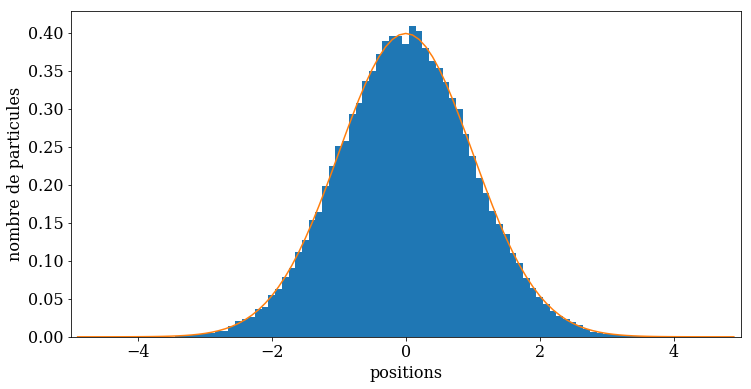

In [3]:
# génère un ensemble de positions initiales basées sur une distribution Gaussienne
npart=100000

# on pose mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution

fig = pyplot.figure(figsize=(12,6))
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')

pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

On a bien une distribution gaussienne centrée en zéro ce qui signifie qu'initialement, les particules sont proches de la position zéro.

A présent, on prend un échantillon de 20 particules et on va représenter les 20 trajectoires que ces particules suivent avec comme distribution initiale $x_0$, celle d'une gaussienne centrée en zéro, générée ci-dessus.

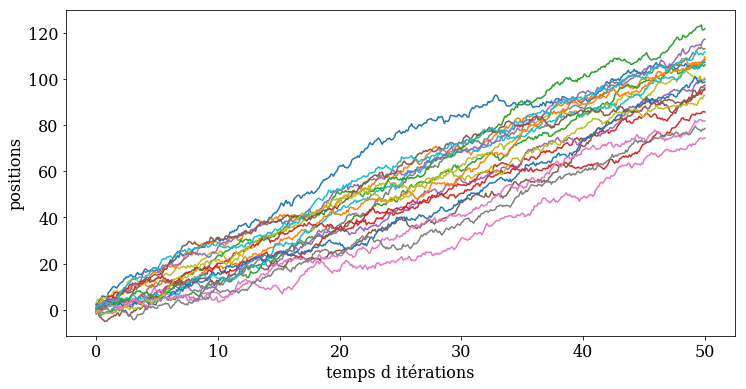

In [4]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x1 = numpy.empty([nt+1,npart])
x2 = numpy.empty([nt+1,npart])

x1[0]=x0
x2[0]=x0

for i in range(nt):
    x1[i+1]=x1[i]+ c1*dt+ numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x2[i+1]=x2[i]+ c2*dt+ numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    
fig = pyplot.figure(figsize=(12,6))
pyplot.xlabel('temps d itérations')
pyplot.ylabel('positions')
for i in range(20):

    pyplot.plot(t,x1[:,i])
   

Les 20 moléules suivent bien des trajectoires différentes. On voit que plus on avance dans le temps, plus on s'éloigne de la position initiale proche de zéro, et plus la moyenne s'élargit.

A présent, on va représenter l'histogramme, à la fin de la simulation et on va le comparer à la solution analytique de l'équation de diffusion trouvée au dessus.

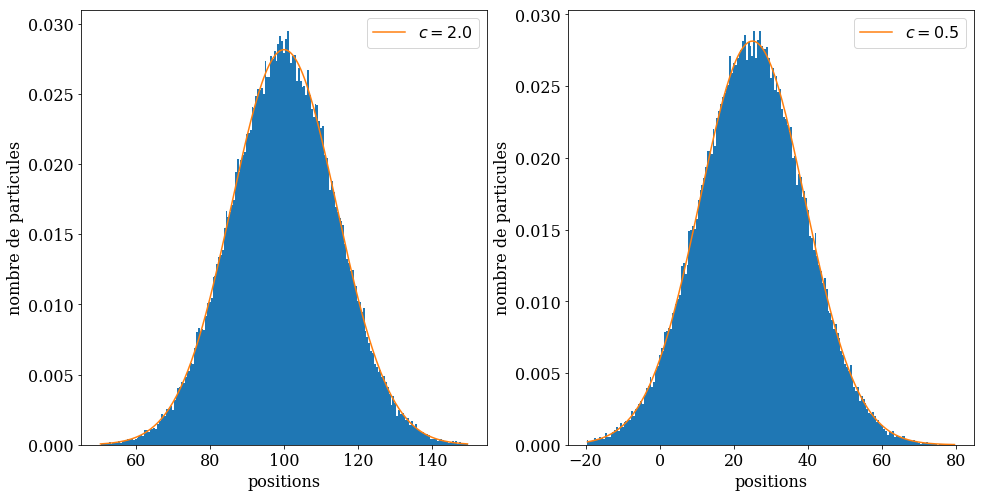

In [5]:
# Generate bins centered around 0
binwidth=0.5
bins1=numpy.arange(50,150,binwidth)
bins2=numpy.arange(-20,80,binwidth)

bins1 = bins1 + binwidth/2
bins2 = bins2 + binwidth/2

# Compute bin centers
bin_centers1 = bins1[:-1]+binwidth /2
bin_centers2 = bins2[:-1]+binwidth /2

# plot a histrogram for verification

fig = pyplot.figure(figsize=(16,8))

pyplot.subplot(1, 2, 1)
pyplot.hist(x1[nt],bins1,normed=True)
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers1, numpy.exp(-(bin_centers1-c1*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2),label='$c=2.0$')
pyplot.legend()

pyplot.subplot(1, 2, 2)
pyplot.hist(x2[nt],bins2,normed=True)
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')
sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers2, numpy.exp(-(bin_centers2-c2*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2),label='$c=0.5$')
pyplot.legend()



On remarque qu'on a bien la bonne solution à l'équation de diffusion et que les mouvements des particules suivent une distibution gaussienne. On remarque bien aussi que plus $c$ est grand, plus la gaussienne est excentrée par rapport à zéro.

## Challenge n°2

- Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

Pour ce challenge, on a un terme de friction qui vient se rajouter, régit par la constante $\gamma$.
Comme précédement, on va regarder les trajectoires pour 20 particules caractérisé par ce nouveau déplacement $dx$.

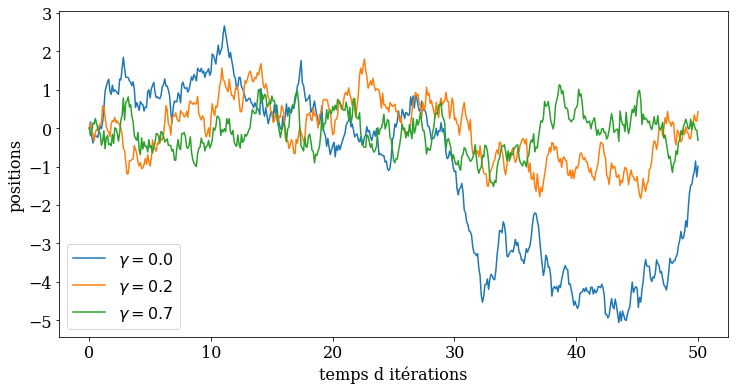

In [6]:
# Total simulation time
T=50.0

# Number of time steps and time interval dt
nt=500
dt=T/nt

# Diffusion coefficient
alpha=0.2

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt) #t petit

x1 = numpy.zeros(nt+1)
x2 = numpy.zeros(nt+1)
x3 = numpy.zeros(nt+1)

x1[0]=0
x2[0]=0
x3[0]=0

#terme de friction 
gamma1 = 0.0
gamma2 = 0.2
gamma3 = 0.7

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x1[i+1]=x1[i]-gamma1*x1[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x2[i+1]=x2[i]-gamma2*x2[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)
    x3[i+1]=x3[i]-gamma3*x3[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

fig = pyplot.figure(figsize=(12,6))
pyplot.xlabel('temps d itérations')
pyplot.ylabel('positions')
pyplot.plot(t,x1,label='$\gamma=0.0$')
pyplot.plot(t,x2,label='$\gamma=0.2$')
pyplot.plot(t,x3,label='$\gamma=0.7$')
pyplot.legend()


On remarque que plus $\gamma$ augmente, plus les particules ont tendance à rester localisées autour de la position initiale. A présent, représentons 2 histogrammes différents pour 2 $\gamma$ différents pour 20 trajectoires de particules. 

Comme précédement, on initialise les positions initiales des différentes particules autour de zéro.

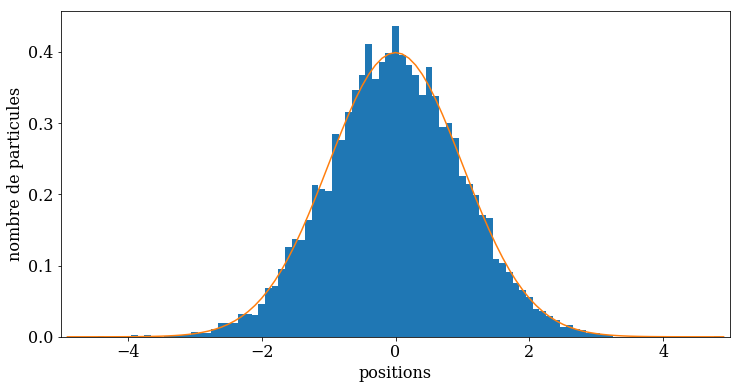

In [7]:
# génère un ensemble de positions initiales basées sur une distribution Gaussienne
npart=10000

# on pose mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
fig = pyplot.figure(figsize=(12,6))

pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

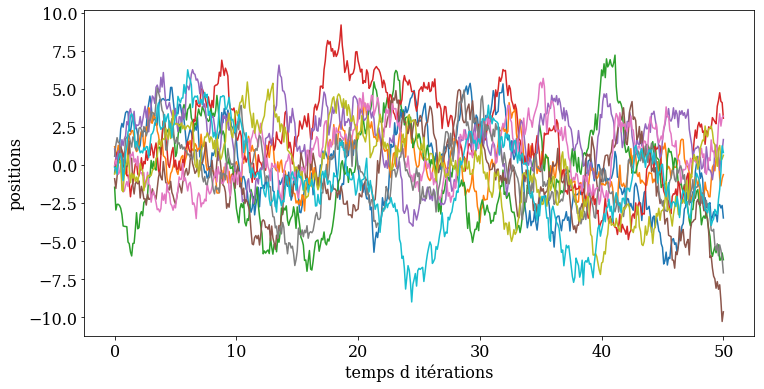

In [8]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x2 = numpy.zeros([nt+1,npart])
x3 = numpy.zeros([nt+1,npart])

x2[0]=x0
x3[0]=x0

for i in range(nt):
    x2[i+1]=x2[i]-gamma2*x2[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
    x3[i+1]=x3[i]-gamma3*x3[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)
fig = pyplot.figure(figsize=(12,6))
pyplot.xlabel('temps d itérations')
pyplot.ylabel('positions')
for i in range(10):
    
    pyplot.plot(t,x2[:,i])


Regadons, à présent, comment évolue la distribution gaussienne avec gamma:

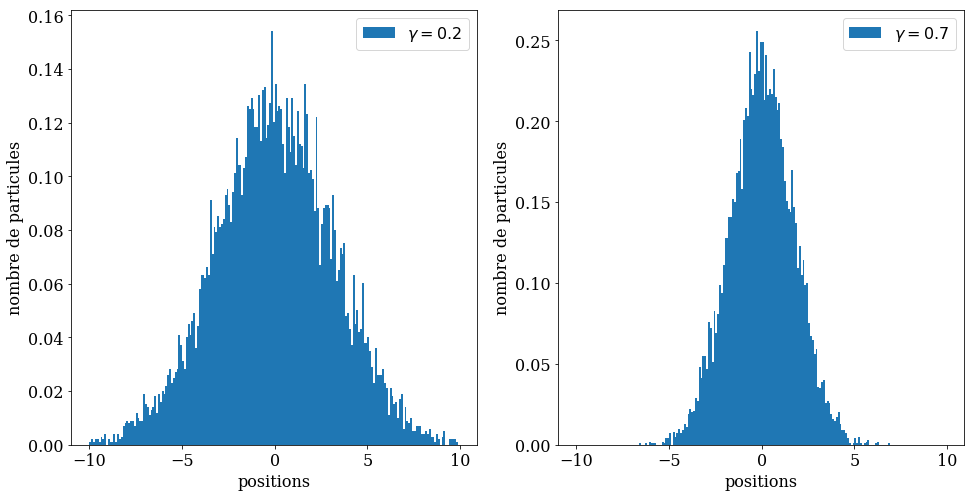

In [9]:
binwidth=0.1

bins_1=numpy.arange(-10,10,binwidth)
bins_2=numpy.arange(-10,10,binwidth)

fig = pyplot.figure(figsize=(16,8))
pyplot.subplot(1,2,1)
pyplot.hist(x2[nt],bins_1,normed=True,label='$\gamma=0.2$');
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')
pyplot.legend()
pyplot.subplot(1,2,2)
pyplot.hist(x3[nt],bins_2,normed=True,label='$\gamma=0.7$');
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')
pyplot.legend()

On remarque bien que plus gamma est grand, plus la gaussienne est fine. Etant donné que l'effet de friction tend à garder les particules à leur positions initiales, celles-ci vont pouvoir occuper moins de positions différentes et auront tendance à rester autour de zéro. La moyenne est donc raccourcie. 

Regardons à présent ce qui se passe lorsque $t$ tend vers l'infini. On va regarder la distibution à différents moment et tenté de repérer ce qu'il se passe. Pour regarder ce qui se passe à t qui tend vers l'infini, on va fixer un $\gamma = 0.2$

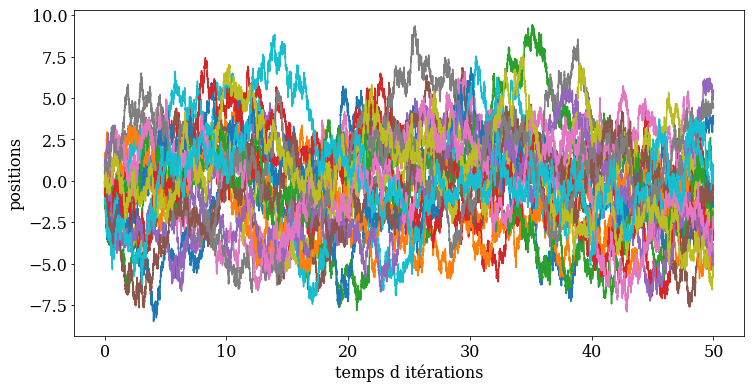

In [10]:
T=50.0

gamma = 0.2

nt1=10
nt2=100
nt3=10000
nt4=20000

dt=T/nt4

alpha=2.0

t = numpy.arange(0,T+dt,dt)

x = numpy.empty([nt4+1,npart])

x[0]=x0

for i in range(nt4):
    x[i+1]=x[i]-gamma*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

fig = pyplot.figure(figsize=(12,6))
pyplot.xlabel('temps d itérations')
pyplot.ylabel('positions')
for i in range(20):
    pyplot.plot(t,x[:,i])
    

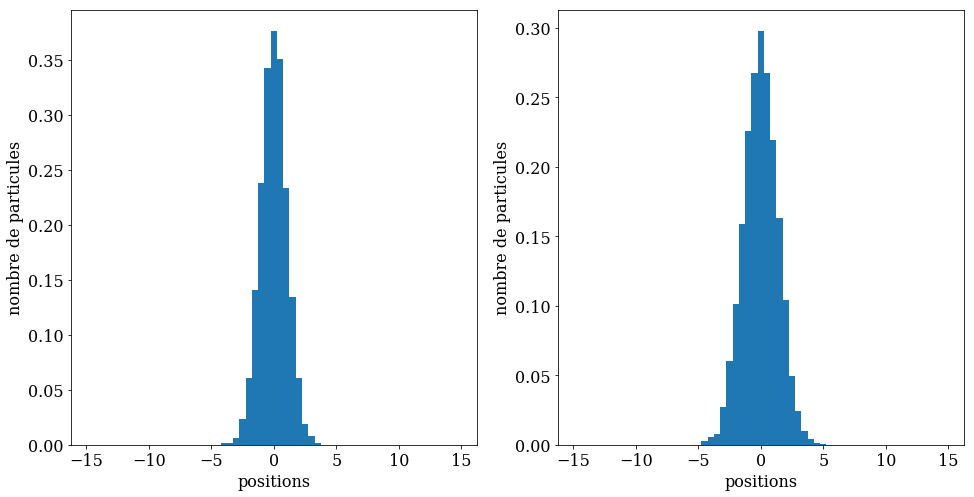

In [11]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-15,15,binwidth)
bins = bins+ binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth /2

fig = pyplot.figure(figsize=(16,8))
pyplot.subplot(1, 2, 1)
pyplot.hist(x[nt1],bins,normed=True)
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')
pyplot.subplot(1, 2, 2)
pyplot.hist(x[nt2],bins,normed=True)
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')

pyplot.show()



Text(0,0.5,'nombre de particules')

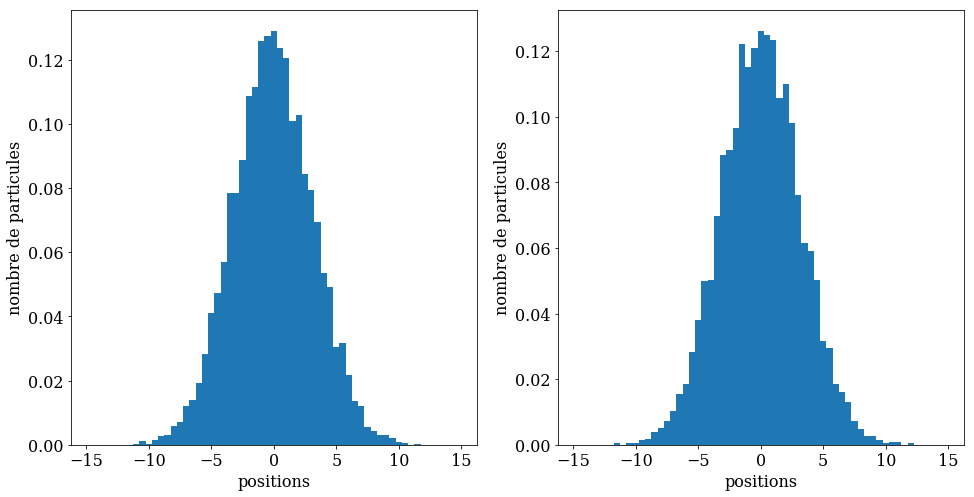

In [12]:
fig = pyplot.figure(figsize=(16,8))
pyplot.subplot(1, 2, 1)
pyplot.hist(x[nt3],bins,normed=True);
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')
pyplot.subplot(1, 2, 2)
pyplot.hist(x[nt4],bins,normed=True);
pyplot.xlabel('positions')
pyplot.ylabel('nombre de particules')

On remarque que la distribution va, à un moment donné, se stabiliser. 

# Conclusion

Pour conclure, nous avons tenté de déterminer les distibutions de positions de particules dans un fluide lorsque celles-ci sont régis par des déplacements différents. Dans le premier cas, où une contribution est systèmatiquement ajoutée au déplacement, on a montrer que la distribution était encore une gaussienne et on a réussit à trouver la bonne solution de l'équation de diffusion dans ce cas-là. Dans le deuxième cas, un terme de friction est ajouté au déplacement et on a également pu montrer que la distribution suivait toujours une gaussienne. Enfin, on a montré que dans ce cas là, la gaussienne se stabilise pour des temps de prise de données très longs.